In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('2018_gem_cm_I10I9.txt.gz', sep='\s+', dtype=str, names=['source', 'target', 'meta'])

In [3]:
df['approximate'] = df['meta'].apply(lambda s: s[0])
df['no_map'] = df['meta'].apply(lambda s: s[1])
df['combination'] = df['meta'].apply(lambda s: s[2])
df['scenario'] = df['meta'].apply(lambda s: s[3])
df['choice_list'] = df['meta'].apply(lambda s: s[4])

In [7]:

codes = list(df['source'][df['no_map'] == '1'])
status = ['no_map' for _ in codes]
for code, source_df in df[df['no_map'] =='0'].groupby('source'):
    codes.append(code)
    if len(source_df) == 1:
        status.append('11_map')
    elif len(set(source_df['scenario'])) > 1:
        status.append('ambigious')
    elif len(set(source_df['choice_list'])) < len(source_df):
        status.append('1n_map(resolved)')
    else:
        status.append('1n_map')
        

status = pd.DataFrame({'code': codes, 'status': status})

In [8]:
status.value_counts('status')

status
11_map              63111
1n_map               3851
1n_map(resolved)     3762
no_map                731
ambigious             249
dtype: int64

/home/asem/GP/env/icenode-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status', ylabel='count'>

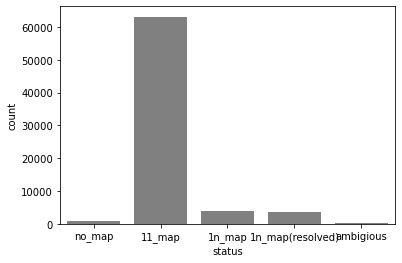

In [9]:
sns.countplot(status['status'], color='gray')


In [65]:
df[df['no_map'] == '1']

,source,target,meta,approximate,no_map,combination,scenario,choice_list
28106,R29700,NoDx,11000,1,1,0,0,0
28107,R29701,NoDx,11000,1,1,0,0,0
28108,R29702,NoDx,11000,1,1,0,0,0
28109,R29703,NoDx,11000,1,1,0,0,0
28110,R29704,NoDx,11000,1,1,0,0,0
...,...,...,...,...,...,...,...,...
80981,Z6731,NoDx,11000,1,1,0,0,0
80982,Z6740,NoDx,11000,1,1,0,0,0
80983,Z6741,NoDx,11000,1,1,0,0,0
80984,Z6790,NoDx,11000,1,1,0,0,0


In [67]:
df['approximate'].astype(int).mean()

0.9568345323741008